In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Files/weather.csv', parse_dates=True, index_col=0)

In [3]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
2008-02-06,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,ENE,9.0,...,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
2008-02-07,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,S,15.0,...,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
2008-02-08,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,SE,7.0,...,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,12.6,Yes
2008-02-09,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,W,19.0,...,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,8.8,Yes


In [4]:
data.tail(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-16,11.9,17.3,0.0,1.6,0.2,WNW,26.0,W,WSW,19.0,...,69.0,1026.2,1023.5,7.0,7.0,13.3,17.2,No,0.0,No
2017-06-17,13.2,19.1,0.0,1.0,0.2,SSW,26.0,WNW,SSW,9.0,...,67.0,1024.3,1021.8,7.0,7.0,14.6,17.4,No,1.8,Yes
2017-06-18,11.3,18.0,1.8,2.0,6.3,S,52.0,SW,SSW,13.0,...,62.0,1025.7,1025.8,3.0,5.0,12.9,17.6,Yes,0.4,No
2017-06-19,11.2,18.3,0.4,2.2,1.9,SSW,37.0,W,S,17.0,...,69.0,1030.4,1028.4,6.0,7.0,12.7,17.2,No,4.4,Yes
2017-06-20,11.3,20.0,4.4,2.2,5.8,W,26.0,W,SSW,19.0,...,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,0.0,No
2017-06-21,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,0.0,No
2017-06-22,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,0.0,No
2017-06-23,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,0.0,No
2017-06-24,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,17.0,...,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,0.0,No


In [5]:
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']
data['AvgHumidity'] = (data['Humidity9am'] + data['Humidity3pm']) / 2
data['AvgPressure'] = (data['Pressure9am'] + data['Pressure3pm']) / 2

In [6]:
data['RainToday'] = np.array([0 if value == 'No' else 1 for value in data['RainToday']])

In [7]:
dataset = data[['TempDiff', 'Rainfall', 'AvgHumidity', 'AvgPressure', 'Temp3pm', 'RainToday', 'RainTomorrow']]
dataset

,TempDiff,Rainfall,AvgHumidity,AvgPressure,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,
2008-02-01,2.9,15.6,88.0,1017.50,20.9,1,Yes
2008-02-02,6.1,6.0,78.0,1017.15,24.8,1,Yes
2008-02-03,2.9,6.6,87.0,1016.15,23.0,1,Yes
2008-02-04,2.6,18.8,86.5,1013.00,20.9,1,Yes
2008-02-05,6.0,77.4,81.0,1006.55,25.5,1,Yes
...,...,...,...,...,...,...,...
2017-06-21,11.0,0.0,62.5,1025.60,17.9,0,No
2017-06-22,9.9,0.0,65.5,1026.55,18.7,0,No
2017-06-23,8.3,0.0,70.5,1017.90,17.3,0,No


In [8]:
dataset.describe()

,TempDiff,Rainfall,AvgHumidity,AvgPressure,Temp3pm,RainToday
count,3333.000000,3331.000000,3317.000000,3309.000000,3333.000000,3337.000000
mean,8.138914,3.330231,61.479650,1017.177847,21.533333,0.261313
std,3.063249,9.895172,14.294485,6.961007,4.303737,0.439416
min,0.200000,0.000000,15.500000,988.850000,10.200000,0.000000
25%,6.100000,0.000000,52.500000,1012.650000,18.400000,0.000000
50%,8.000000,0.000000,62.000000,1017.350000,21.300000,0.000000
75%,10.100000,1.400000,71.000000,1022.000000,24.500000,1.000000
max,24.100000,119.400000,96.000000,1037.400000,44.700000,1.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
fig, ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='AvgHumidity', y= 'AvgPressure', c='b', alpha = .25, ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='AvgHumidity', y= 'AvgPressure', c='r', alpha = .25, ax=ax)

<Axes: xlabel='AvgHumidity', ylabel='AvgPressure'>

In [11]:
dataset.isnull().sum()
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 3286)

In [12]:
X = dataset_clean[['TempDiff', 'Rainfall', 'AvgHumidity', 'AvgPressure', 'Temp3pm', 'RainToday']]
Y = dataset_clean['RainTomorrow']

In [13]:
Y = np.array([0 if value == 'No' else 1 for value in Y])
Y

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=42)

In [15]:
X_train.iloc[0]

TempDiff         11.40
Rainfall          2.20
AvgHumidity      41.50
AvgPressure    1024.45
Temp3pm          18.40
RainToday         1.00
Name: 2015-05-14 00:00:00, dtype: float64

In [16]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7968369829683698

In [17]:
sum(Y == 0)/len(Y)

0.7401095556908095

In [18]:
num_samples = 10000

# Generate random data for each feature
temp_diff = np.random.rand(num_samples) * 30   # TempDiff: 0 to 30
rainfall = np.random.rand(num_samples) * 140   # Rainfall: 0 to 140
avg_humidity = np.random.rand(num_samples) * 100  # AvgHumidity: 0 to 100
avg_pressure = np.random.rand(num_samples) * 100 + 950  # AvgPressure: 950 to 1050
temp3pm = np.random.rand(num_samples) * 50   # Temp3pm: 0 to 50
rain_today = np.random.randint(0, 2, num_samples)  # RainToday: 0 or 1

# Combine the features into one array
X_map = np.column_stack((temp_diff, rainfall, avg_humidity, avg_pressure, temp3pm, rain_today))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


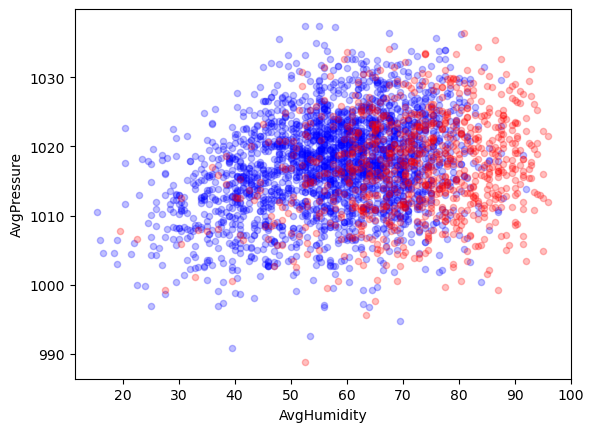

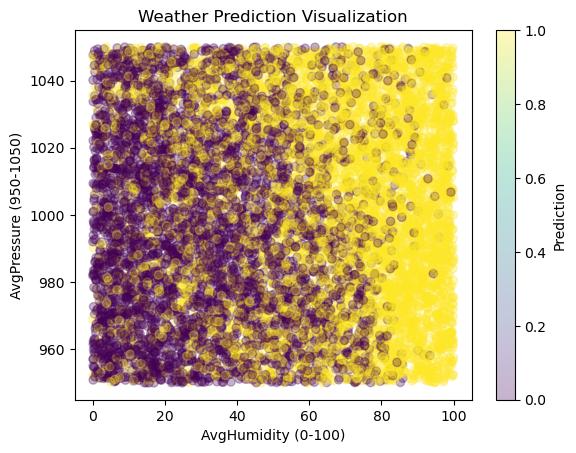

In [19]:

Y_map = neigh.predict(X_map)

fig, ax = plt.subplots()
sc = ax.scatter(x=X_map[:, 2], y=X_map[:, 3], c=Y_map, alpha=0.3)
plt.xlabel('AvgHumidity (0-100)')
plt.ylabel('AvgPressure (950-1050)')
plt.colorbar(sc, label='Prediction')
plt.title('Weather Prediction Visualization')
plt.show()


In [20]:
scores = []
for k in range (1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    sc = accuracy_score(Y_test, Y_pred)
    scores.append(sc)

In [21]:
fig, ax = plt.subplots()
ax.plot(scores)

In [22]:
max_val = max(scores[0:20])
max_index = scores.index(max_val)
max_index

12

In [23]:
neigh = KNeighborsClassifier(n_neighbors= max_index)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8102189781021898